In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)
library(gridExtra)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
honey<- read.csv('../input/honeyproduction.csv')

In [3]:
head(honey)

state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
AL,16000,71,1136000,159000,0.72,818000,1998
AZ,55000,60,3300000,1485000,0.64,2112000,1998
AR,53000,65,3445000,1688000,0.59,2033000,1998
CA,450000,83,37350000,12326000,0.62,23157000,1998
CO,27000,72,1944000,1594000,0.70,1361000,1998
FL,230000,98,22540000,4508000,0.64,14426000,1998


In [4]:
summary(honey)

     state         numcol        yieldpercol       totalprod       
 AL     : 15   Min.   :  2000   Min.   : 19.00   Min.   :   84000  
 AR     : 15   1st Qu.:  9000   1st Qu.: 48.00   1st Qu.:  475000  
 AZ     : 15   Median : 26000   Median : 60.00   Median : 1533000  
 CA     : 15   Mean   : 60284   Mean   : 62.01   Mean   : 4169086  
 CO     : 15   3rd Qu.: 63750   3rd Qu.: 74.00   3rd Qu.: 4175250  
 FL     : 15   Max.   :510000   Max.   :136.00   Max.   :46410000  
 (Other):536                                                       
     stocks           priceperlb       prodvalue             year     
 Min.   :    8000   Min.   :0.4900   Min.   :  162000   Min.   :1998  
 1st Qu.:  143000   1st Qu.:0.9325   1st Qu.:  759250   1st Qu.:2001  
 Median :  439500   Median :1.3600   Median : 1841500   Median :2005  
 Mean   : 1318859   Mean   :1.4096   Mean   : 4715741   Mean   :2005  
 3rd Qu.: 1489500   3rd Qu.:1.6800   3rd Qu.: 4703250   3rd Qu.:2009  
 Max.   :13800000   Max.   :4.

In [5]:
str(honey)

'data.frame':	626 obs. of  8 variables:
 $ state      : Factor w/ 44 levels "AL","AR","AZ",..: 1 3 2 4 5 6 7 8 10 11 ...
 $ numcol     : num  16000 55000 53000 450000 27000 230000 75000 8000 120000 9000 ...
 $ yieldpercol: int  71 60 65 83 72 98 56 118 50 71 ...
 $ totalprod  : num  1136000 3300000 3445000 37350000 1944000 ...
 $ stocks     : num  159000 1485000 1688000 12326000 1594000 ...
 $ priceperlb : num  0.72 0.64 0.59 0.62 0.7 0.64 0.69 0.77 0.65 1.19 ...
 $ prodvalue  : num  818000 2112000 2033000 23157000 1361000 ...
 $ year       : int  1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 ...


I will try to analyze few aspects from the data like .

The overall trend of the totalProduction across multiple years.

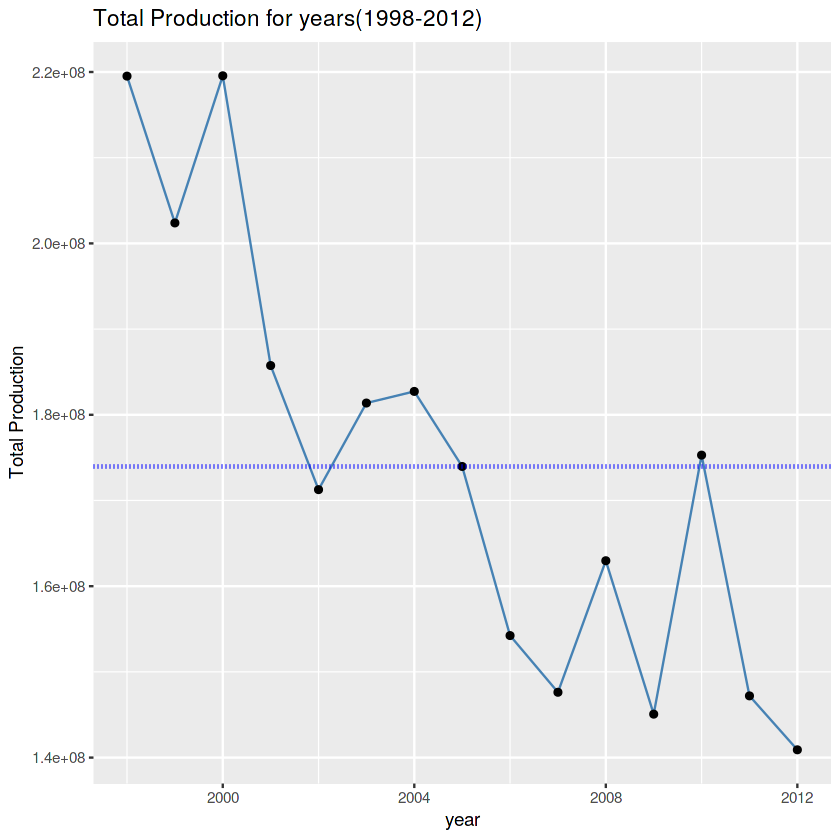

In [13]:
#overall trend of production for 1998-2012

ProductionPerYear<-honey%>%
group_by(year)%>%
summarize(TotalProduction=sum(totalprod))

Production <- ggplot(ProductionPerYear,aes(x=year,y=TotalProduction))+
geom_line(color="steelblue")+
geom_point()+
geom_hline(yintercept = median(ProductionPerYear$TotalProduction), linetype="dotted", 
                color = "blue", size=1)+
labs(x="year",y="Total Production",title="Total Production for years(1998-2012)")

Production

From the above line graph , it can be seen that the honey production has been falling since the begining of 2001.

* Honey production in 2012 was the least amongst all the years from 1998-2012.

* Since 2005 honey production in the USA has been below the median honey production with an exception of 2010, which had slightly higher honey production quantity than the median.

It would be interesting to look at the total honey consumed for all the years. We have a variable in the dataset which describes the stocks , this describes the inventory that each state has vby december 15 of that year. 

So to get the amount of honey consumed, we can obtain it by using subtracting totalprod-stocks.

In [9]:
#adding a new variable consumption
honey$consumption <- honey$totalprod-honey$stocks

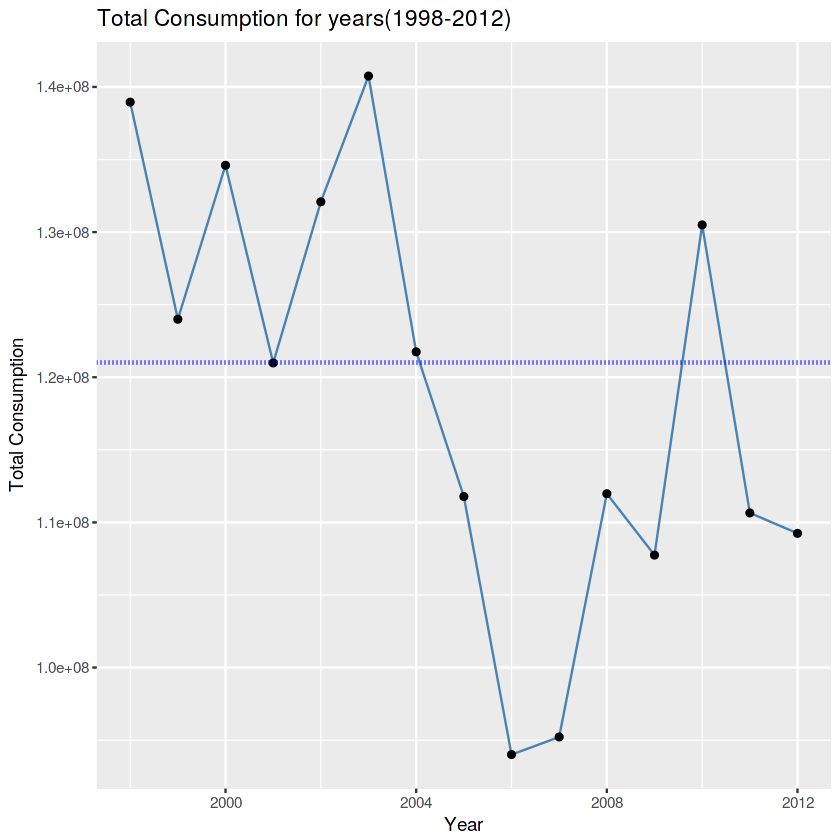

In [12]:
#overall trend of consumption for 1998-2012

ProductionPerYear<-honey%>%
group_by(year)%>%
summarize(TotalConsumption=sum(consumption))

consumption<-ggplot(ProductionPerYear,aes(x=year,y=TotalConsumption))+
geom_line(color="steelblue")+
geom_point()+
geom_hline(yintercept = median(ProductionPerYear$TotalConsumption), linetype="dotted", 
                color = "blue", size=1)+
labs(x="Year",y="Total Consumption",title="Total Consumption for years(1998-2012)")

consumption

The trend in honey consumption gives a different story than the honey production.

* Honey consumption was highest in the year 2003. 

* Consumption of honey was least in the year 2006. This may be because of the problem in honey production which came into light in the year 2006.

* The fall in honey consumption has been steep from the year 2004-2006. 

* Consumption of honey has got a steady traction from the year 2007 till 2010 with an exception of 2009 where there was a slight fall in consumption as compared to previous year.


In [14]:
head(honey)

state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,consumption
AL,16000,71,1136000,159000,0.72,818000,1998,977000
AZ,55000,60,3300000,1485000,0.64,2112000,1998,1815000
AR,53000,65,3445000,1688000,0.59,2033000,1998,1757000
CA,450000,83,37350000,12326000,0.62,23157000,1998,25024000
CO,27000,72,1944000,1594000,0.70,1361000,1998,350000
FL,230000,98,22540000,4508000,0.64,14426000,1998,18032000


Let's see the top 20 honey producing states of all time.

In [42]:
productionperstate <- honey%>%
group_by(state)%>%
summarise(sumprod=sum(totalprod))%>%
arrange(desc(sumprod))%>%
head(20)%>%
mutate(percentage=round(sumprod/sum(sumprod)*100,2))%>%
ggplot(aes(x=reorder(state,sumprod),y=sumprod))+
geom_col(aes(fill=state),show.legend=F)+
geom_text(aes(label=percentage))+
coord_flip()+
labs(x="States in the USA",y="Total honey produced",title="Total Honey produced by each state")

In [43]:
consumptionperstate<-honey%>%
group_by(state)%>%
summarise(sumconsumption=sum(consumption))%>%
arrange(desc(sumconsumption))%>%
head(20)%>%
mutate(percentage=round(sumconsumption/sum(sumconsumption)*100,2))%>%
ggplot(aes(x=reorder(state,sumconsumption),y=sumconsumption))+
geom_col(aes(fill=state),show.legend=F)+
geom_text(aes(label=percentage))+
coord_flip()+
labs(x="States in the USA",y="Total honey consumed",title="Total Honey consumed by each state")

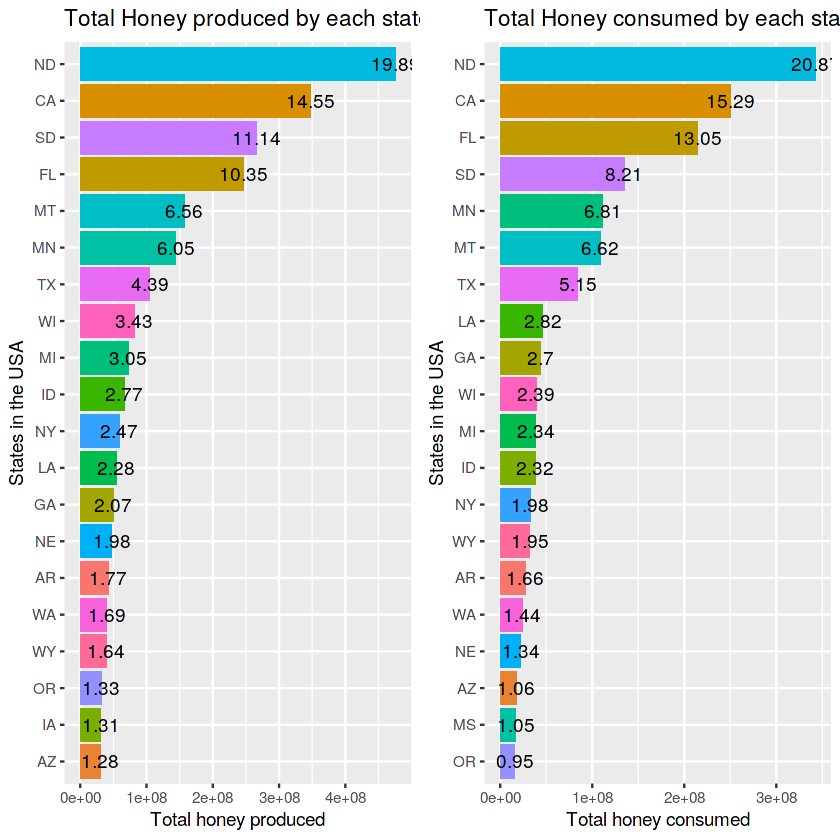

In [49]:
#Looking at both production and consumption graphs side by side
grid.arrange(productionperstate,consumptionperstate,ncol=2)

From the above plot it seems that the top 3 honey producing states are also the top 3 honey consuming states. 

But the relative percentage of honey consumption is higher in these states as compared to the relative percentage of honey consumption. 

Nesxt I want to find out the top 20 states with the most inventory.

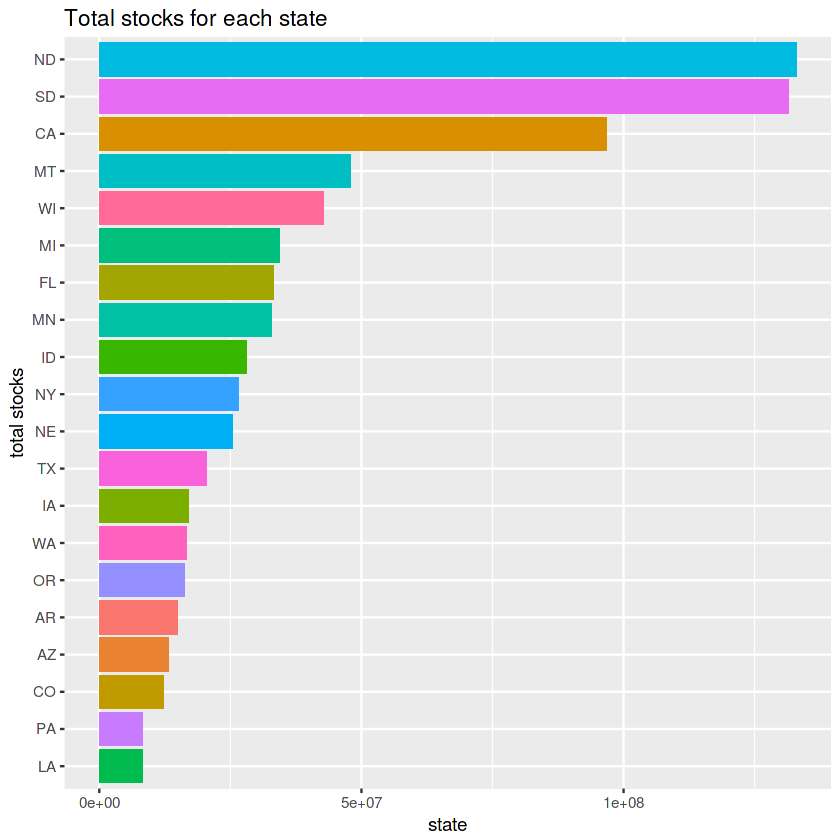

In [48]:
honey%>%
group_by(state)%>%
summarise(totalstocks=sum(stocks))%>%
arrange(desc(totalstocks))%>%
head(20)%>%
ggplot(aes(x=reorder(state,totalstocks),y=totalstocks,fill=state))+
geom_col(show.legend=F)+
coord_flip()+
labs(x="total stocks",y="state",title="Total stocks for each state")



In case if there is a shortage in the supply of honey in any state , the go to states will be North and South Dakota, followed by California. 